In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression


In [2]:
data=pd.read_csv("//content/sample_data/california_housing_train.csv")

In [3]:
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
0          1015.0       472.0         1.4936             66900.0  
1          1129.0       463.0         1.8200             80100.0  
2           333.0       117.0         1.6509             85700.0  
3           515.0       226.0         3.1917             73400.0  
4           624.0       262.0         1.9250             65500.0  
...           ...         ...            ...                 ...  
16995       907.0       369.0         2.3571            111400.0  
16996      1194.0       465.0         2.5179             79000.0  
16997      1244.0       456.0         3.0313            103600.0  
16998      1298.0       478.0         1.9797             85800.0  
16999       806.0       270.0         3.0147             94600.0  

[17000 rows x 9 columns]

In [4]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [5]:
data.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
16995       907.0       369.0         2.3571            111400.0  
16996      1194.0       465.0         2.5179             79000.0  
16997      1244.0       456.0         3.0313            103600.0  
16998      1298.0       478.0         1.9797             85800.0  
16999       806.0       270.0         3.0147             94600.0

In [6]:
data.shape

(17000, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [8]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [9]:
data.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [10]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    790.000000    282.000000       2.566375   
50%        434.000000   1167.000000    409.000000       3.544600   
75%        648.250000   1721.000000    605.250000       4.767000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        17000.000000  
mean        207300.912353  
std         115983.764387  
min          14999.000000  
25%         119400.000000  
50%         180400.000000  
75%         265000.000000  
max         500001.000000

In [11]:
data['total_bedrooms'].fillna(int(data['total_bedrooms'].mean()), inplace=True)

In [12]:
pip install ydata_profiling

In [13]:
from ydata_profiling import ProfileReport

In [14]:
view=ProfileReport(data)

In [15]:
view

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
enc=LabelEncoder()

In [17]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

x=data.drop(['median_house_value','longitude','latitude'],axis=1)
y=data['median_house_value']

In [19]:
x

housing_median_age  total_rooms  total_bedrooms  population  \
0                    15.0       5612.0          1283.0      1015.0   
1                    19.0       7650.0          1901.0      1129.0   
2                    17.0        720.0           174.0       333.0   
3                    14.0       1501.0           337.0       515.0   
4                    20.0       1454.0           326.0       624.0   
...                   ...          ...             ...         ...   
16995                52.0       2217.0           394.0       907.0   
16996                36.0       2349.0           528.0      1194.0   
16997                17.0       2677.0           531.0      1244.0   
16998                19.0       2672.0           552.0      1298.0   
16999                52.0       1820.0           300.0       806.0   

       households  median_income  
0           472.0         1.4936  
1           463.0         1.8200  
2           117.0         1.6509  
3           226.0         3.1917  
4           262.0         1.9250  
...           ...            ...  
16995       369.0         2.3571  
16996       465.0         2.5179  
16997       456.0         3.0313  
16998       478.0         1.9797  
16999       270.0         3.0147  

[17000 rows x 6 columns]

In [20]:
y

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [22]:
train_data=x_train.join(y_train)

In [23]:
train_data

housing_median_age  total_rooms  total_bedrooms  population  \
10647                21.0       1779.0           399.0      1446.0   
11741                35.0       2097.0           351.0       977.0   
4449                 32.0       3191.0           634.0      1718.0   
3905                 25.0       1611.0           383.0       554.0   
2550                 27.0        334.0            56.0       130.0   
...                   ...          ...             ...         ...   
16432                49.0       2860.0           552.0      1178.0   
8964                 32.0       4121.0           755.0      2590.0   
5944                 28.0       1841.0           809.0      3199.0   
5327                 34.0       2765.0           515.0      1422.0   
15305                52.0        340.0            97.0       200.0   

       households  median_income  median_house_value  
10647       371.0         2.4414             71900.0  
11741       358.0         4.3958            108400.0  
4449        611.0         4.1548            216600.0  
3905        327.0         3.0417            137300.0  
2550         46.0         4.8750            284100.0  
...           ...            ...                 ...  
16432       522.0         4.6250            355000.0  
8964        721.0         3.3462             67600.0  
5944        727.0         1.6319            151600.0  
5327        438.0         5.4727            238900.0  
15305        87.0         1.5208            112500.0  

[13600 rows x 7 columns]

array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

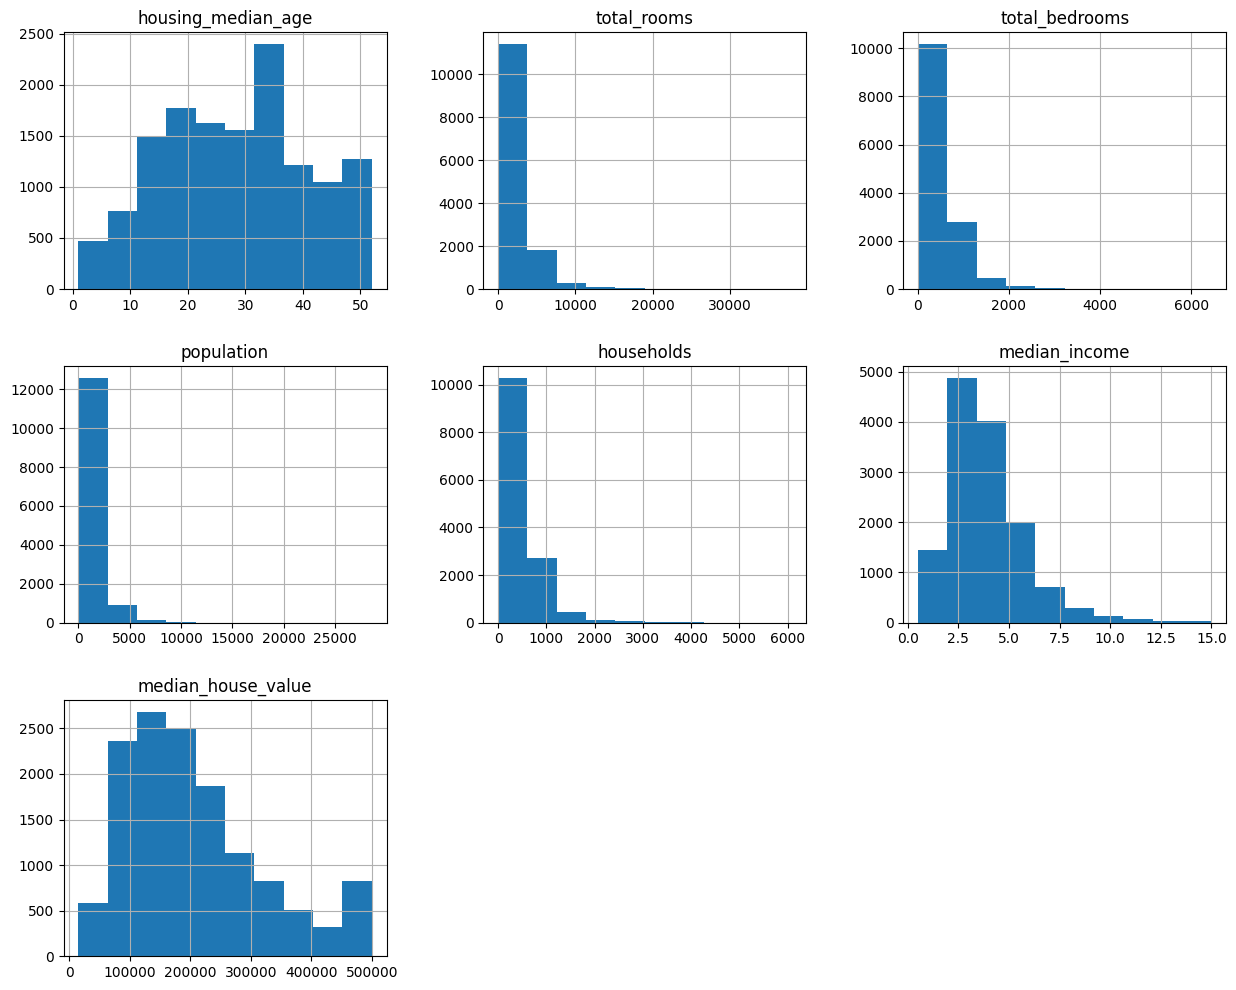

In [24]:
train_data.hist(figsize=(15,12))

In [25]:
train_data.corr()

housing_median_age  total_rooms  total_bedrooms  \
housing_median_age            1.000000    -0.357992       -0.318903   
total_rooms                  -0.357992     1.000000        0.929917   
total_bedrooms               -0.318903     0.929917        1.000000   
population                   -0.297492     0.871640        0.892348   
households                   -0.300750     0.921154        0.981580   
median_income                -0.113497     0.195744       -0.010200   
median_house_value            0.112082     0.130958        0.047728   

                    population  households  median_income  median_house_value  
housing_median_age   -0.297492   -0.300750      -0.113497            0.112082  
total_rooms           0.871640    0.921154       0.195744            0.130958  
total_bedrooms        0.892348    0.981580      -0.010200            0.047728  
population            1.000000    0.919309       0.002302           -0.025620  
households            0.919309    1.000000       0.010771            0.062837  
median_income         0.002302    0.010771       1.000000            0.691132  
median_house_value   -0.025620    0.062837       0.691132            1.000000

<Axes: >

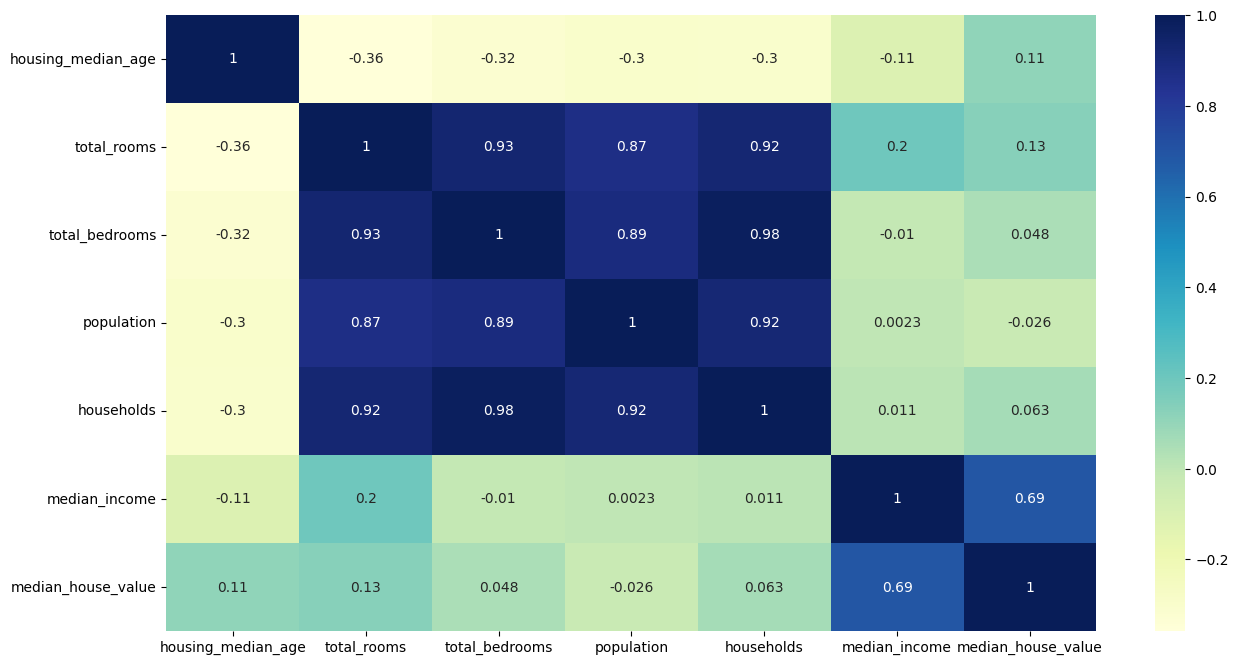

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [27]:
train_data['total_rooms']=np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms'] + 1)
train_data['population']=np.log(train_data['population'] + 1)
train_data['households']=np.log(train_data['households'] + 1)


array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

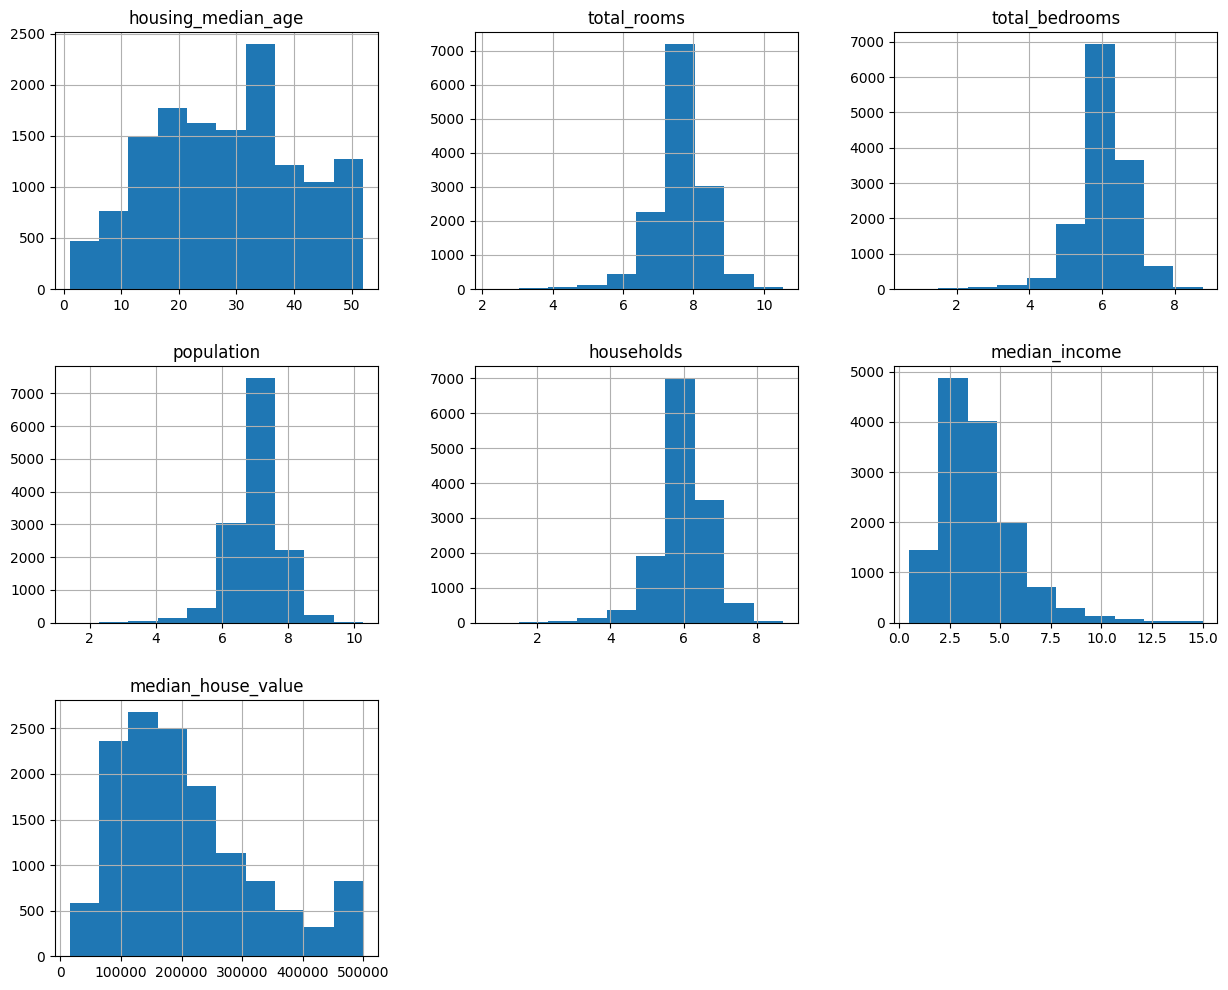

In [28]:
train_data.hist(figsize=(15,12))

In [29]:
data['median_house_value'].value_counts()

500001.0    814
137500.0     95
162500.0     89
112500.0     85
187500.0     74
           ... 
316600.0      1
391300.0      1
392200.0      1
328200.0      1
80500.0       1
Name: median_house_value, Length: 3694, dtype: int64

# MODEL SELECTION

In [30]:
model=RandomForestRegressor()

In [31]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
ypred=model.predict(x_test)

In [33]:
r2_score(y_test,ypred)

0.6691117622575407

In [34]:
model=DecisionTreeRegressor()

In [35]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [36]:
ypred=model.predict(x_test)

In [37]:
r2_score(y_test,ypred)

0.40529934251200506

In [38]:
model=LinearRegression()

In [39]:
model.fit(x_train,y_train)

LinearRegression()

In [40]:
ypred=model.predict(x_test)

In [41]:
r2_score(y_test,ypred)

0.5570264630108317

In [42]:
model=LinearRegression()

In [43]:
model.fit(x_train,y_train)

LinearRegression()

In [44]:
ypred=model.predict(x_test)

In [45]:
r2_score(y_test,ypred)

0.5570264630108317

In [46]:
model=KNeighborsRegressor()

In [47]:
model.fit(x_train,y_train)

KNeighborsRegressor()

In [48]:
ypred=model.predict(x_test)

In [49]:
r2_score(y_test,ypred)

0.2791529209680156

**Conclusion**:
For this house price prediction dataset ,the algorithms used are Logistic Regression, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier, KNeighborsClassifier. Among these algorithms Support Vector Classifier has given highest accuracy of 71%. So,RandomForest() algorithm should be used to fit house price prediction
data for accurate predictions.